In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2020

# tested using julia 1.5.2 and windows Nvidia geforce gtx 1070 Ti

# Include Dependencies

In [2]:
using LinearAlgebra
import JSON
using StaticArrays, BenchmarkTools
using Base.Threads
using CUDA
import Base: +, * , -, ^
using Plots


In [4]:
include("./julia/include/vector.jl") #utils for vectors and quaternions
include("./julia/include/material.jl") #utils for node and edge material
include("./julia/include/export.jl") #export simulation data to json
include("./julia/include/run.jl") #turn setup to cuda arrays and run simulation
include("./julia/include/updateEdges.jl") #edges properties update
include("./julia/include/externalForces.jl") #external forces applied to the system
include("./julia/include/forces.jl") #force integration
include("./julia/include/updateNodes.jl") #nodes properties update

axialStrain (generic function with 1 method)

# Create Geometry

In [42]:
name= "tutorial"
# alternativly you can get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
# include("./julia/examples/poissonTest.jl") #template for hierarchical voxels with global poisson ratio
# include("./julia/examples/latticeTest.jl") #template for lattice voxel (small scale)
# include("./julia/examples/latticeTest2.jl") #template for lattice voxel (big scale with real params)
# include("./julia/examples/rhinoTest.jl") #template for importing geometry from rhino
# include("./julia/examples/rhinoTestChiral.jl") #template for importing chiral array
# include("./julia/examples/rover.jl") #template for importing chiral array
# include("./julia/examples/wing.jl") #template for importing chiral array
# include("./julia/examples/walkingRobot.jl") #template for importing chiral array
include("./julia/examples/nonLinearTest.jl") #template for hierarchical voxels with global poisson ratio



## rerun these just for sanity check for dynamic loads
include("./julia/include/run.jl") #turn setup to cuda arrays and run simulation
include("./julia/include/updateEdges.jl") #edges properties update
include("./julia/include/forces.jl") #force integration
include("./julia/include/updateNodes.jl") #nodes properties update

axialStrain (generic function with 1 method)

In [43]:
#export prev. settings to json
fileName="./json/$(name)Init.json"
setup1=Dict()
setup1["setup"]=setup
stringdata = JSON.json(setup1)
open(fileName, "w") do f
        write(f, stringdata)
end
#run node.js to draw the gerometry using rhino3dm
mycommand = `node app1.js $(name)`
run(mycommand)

Loaded rhino3dm.
Success!


Process(`node app1.js tutorial`, ProcessExited(0))

# Run Simulation

In [44]:
folderPath="./json/tutorial/" # make sure this folder exists
setupSim=getSetup(name);
runMetavoxelGPULive!(setupSim,folderPath)

dt: 1.4235251564292887e-5, s: 0.001, mass: 8.0e-6, momentInertiaInverse: 1.8749999999999997e11
first timestep took 3.051808999 seconds
ran 45 nodes and 96 edges for 300 time steps took 0.609284299 seconds


In [14]:
# set name for simulation
# name= "tutorial"
# name="couponHex"
name="coupon"


"coupon"

# Plot

In [45]:
include("./julia/include/plotViz.jl") #plotting

plotDisplacementTroughTimeSteps (generic function with 2 methods)

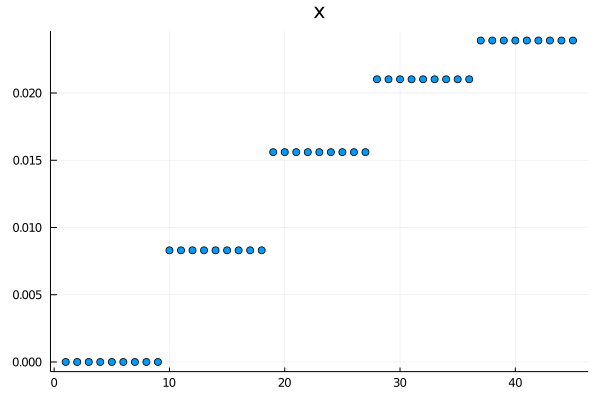

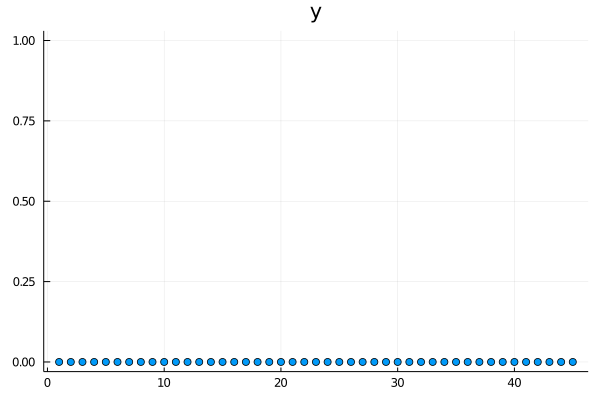

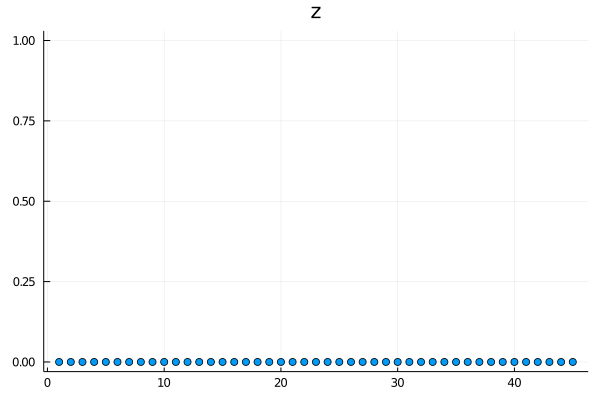

In [46]:
plotFinalDisplacement(name)

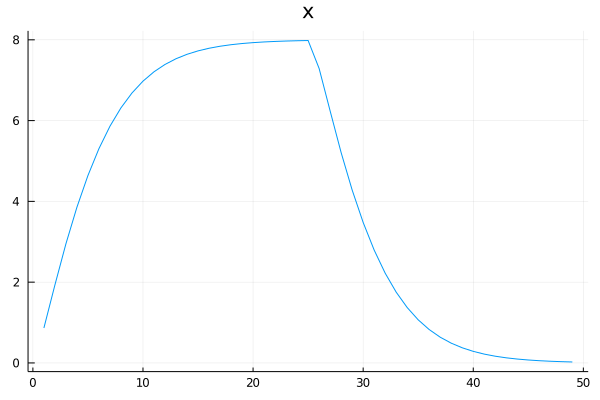

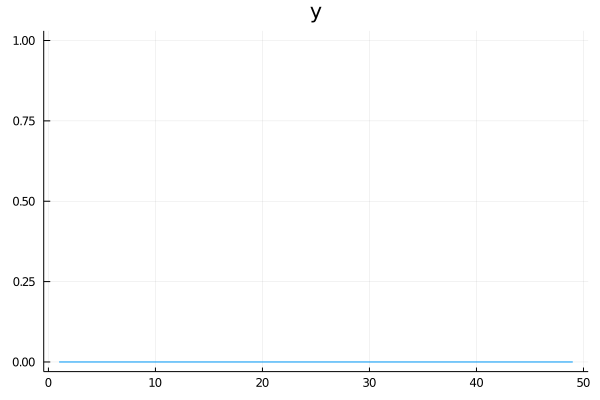

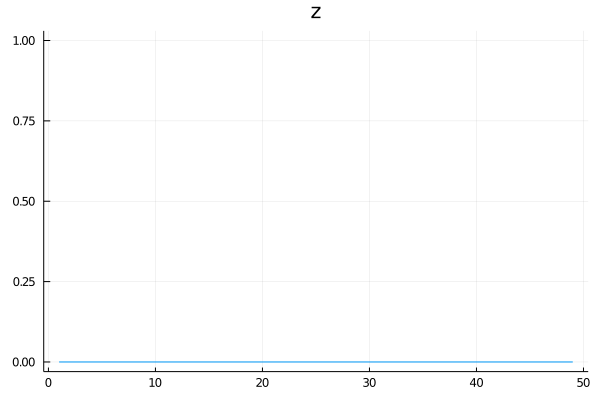

In [47]:
plotDisplacementTroughTimeSteps(name)